In [1]:
import sys

import matplotlib.pyplot as plt

%matplotlib notebook
%matplotlib notebook
## save variables
import pickle
## folder names
from glob import glob
## standard libraries
import numpy as np

#!{sys.executable} -m pip install tensorflow-gpu --user
#!{sys.executable} -m pip install keras --user
import tensorflow as tf
from keras import backend as k

import keras
from keras.optimizers import SGD, Adam
#!{sys.executable} -m pip install hyperas --user
#!{sys.executable} -m pip install networkx==1.11 --user

from hyperas import optim
from hyperas.distributions import choice, uniform, conditional
from hyperopt import Trials, STATUS_OK, tpe

import os.path
import datetime

from dependencies import models
from dependencies import functions

from functools import partial

C:\Users\yurin\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


# Creating dataset

In [7]:
#choose which dictionary to use
choice =       'mfcc'# 'logfilter' #
useDelta =  True

data = {}

#retrieving of used values for the computation of mfcc
with open('variables/mfccValues.pkl', 'rb') as f:  
    values = pickle.load(f)
    
selected = 0

if choice == 'mfcc':
    for index in range(4):
        #name format of the selected data
        if useDelta:
            name = 'variables/mfccDictDD'+functions.getName(index)+'[nC='+str(values[selected][0])+' wL='+str(values[selected][2])+' wS='+str(values[selected][3])+'].pkl'
        else:
            name = 'variables/mfccDict'+functions.getName(index)+'[nC='+str(values[selected][0])+' wL='+str(values[selected][2])+' wS='+str(values[selected][3])+'].pkl'
        #loading in usedDict of the mfcc dict
        with open(name, 'rb') as f: 
            data[functions.getName(index)] = pickle.load(f)
        print('Loaded '+name)

elif choice == 'logfilter':
    for index in range(4):
        #name format of the selected data
        if useDelta:
            name = 'variables/logfiltDictDD'+functions.getName(index)+'[nF='+str(values[selected][1])+' wL='+str(values[selected][2])+' wS='+str(values[selected][3])+'].pkl'
        else:
            name = 'variables/logfiltDict'+functions.getName(index)+'[nF='+str(values[selected][1])+' wL='+str(values[selected][2])+' wS='+str(values[selected][3])+'].pkl'
        #saving in usedDict of the logfilter dict
        with open(name, 'rb') as f:  
            data[functions.getName(index)] = pickle.load(f)
        print('Loaded '+name)

Loaded variables/mfccDictDDTrain[nC=14 wL=0.025 wS=0.01].pkl
Loaded variables/mfccDictDDTest[nC=14 wL=0.025 wS=0.01].pkl
Loaded variables/mfccDictDDValidation[nC=14 wL=0.025 wS=0.01].pkl
Loaded variables/mfccDictDDAugmentedTrain[nC=14 wL=0.025 wS=0.01].pkl


In [8]:
#core words of the dataset
coreKey = ["yes", "no", "up", "down", "left", "right", "on", "off", "stop", "go", "zero",
           "one", "two", "three", "four", "five", "six", "seven", "eight", "nine"]

#split of the core set
numbers = ['one', 'two', 'three','four','five','six','seven','eight','nine', "zero"]

words = ["yes", "no", "up", "down", "left", "right", "on", "off", "stop", "go"]

#selecting the subset of words to predict
usedLabels = words

usedLabels.append('silence')

unknownLabels = list(data['Train'].keys())
for key in usedLabels:
    try:
        unknownLabels.remove(key)
    except:
        print(key, ' not in used')

In [9]:
%%time
#divding between train and test with also scaling data
functions.train_test_creator(
    data,
    usedLabels,
    unknownLabels,
    with_unknown = False,
    scalerType = 'robust',
    depth = (len(data['Train'][words[0]].shape)-3)*2 + 1,
    unknown_percentage = 0.3)

print()


Wall time: 39.7 s


In [10]:
%reset -f 
from IPython.display import Javascript
Javascript("Jupyter.notebook.execute_cells([0])")

<IPython.core.display.Javascript object>

# Import data

In [2]:
dataset, labels = functions.load_dataset()
with open('variables/labelList.pkl', 'rb') as f: 
        labelList = pickle.load(f)

# Fitting

## Fitting variables

In [3]:
# TensorFlow wizardry
config = tf.ConfigProto()
 
# Don't pre-allocate memory; allocate as-needed
config.gpu_options.allow_growth = True
 
# Only allow a total 0.9 of the GPU memory to be allocated
config.gpu_options.per_process_gpu_memory_fraction = 0.8
 
# Create a session with the above options specified.
k.tensorflow_backend.set_session(tf.Session(config=config))

epoch = 15
epochSGD = 15

epochs = [epoch, epochSGD]

adam = Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.001/epoch, amsgrad=True)
sgd = SGD(lr=0.001, decay=0.001/epochSGD, momentum=0.9, nesterov=True)

optimizers = [adam, sgd]

top3_acc = partial(keras.metrics.top_k_categorical_accuracy, k=3)
top3_acc.name = 'top3_acc'

titles = ['Adam History', 'SGD History']

dest_directory = 'model_backup/'
if not os.path.exists(dest_directory):
      os.makedirs(dest_directory)

#tbCallBack = keras.callbacks.TensorBoard(log_dir='./Graph', histogram_freq=0, write_graph=True, write_images=True)

# Sequential Models

## Model1

MODEL1
Using optimizer number 0
Train on 34769 samples, validate on 4203 samples
Epoch 1/15
34769/34769 [==============================] - 9s 252us/step - loss: 1.9061 - acc: 0.3761 - top3_acc: 0.6774 - val_loss: 1.3869 - val_acc: 0.6015 - val_top3_acc: 0.8660
Epoch 2/15
34769/34769 [==============================] - 7s 195us/step - loss: 1.1654 - acc: 0.6156 - top3_acc: 0.8867 - val_loss: 1.0523 - val_acc: 0.7583 - val_top3_acc: 0.9417
Epoch 3/15
34769/34769 [==============================] - 7s 196us/step - loss: 0.8085 - acc: 0.7493 - top3_acc: 0.9297 - val_loss: 0.9139 - val_acc: 0.8425 - val_top3_acc: 0.9576
Epoch 4/15
34769/34769 [==============================] - 7s 203us/step - loss: 0.6486 - acc: 0.8053 - top3_acc: 0.9443 - val_loss: 0.7260 - val_acc: 0.8670 - val_top3_acc: 0.9622
Epoch 5/15
34769/34769 [==============================] - 7s 203us/step - loss: 0.5677 - acc: 0.8331 - top3_acc: 0.9515 - val_loss: 0.9079 - val_acc: 0.8473 - val_top3_acc: 0.9572
Epoch 6/15
34769/34

<IPython.core.display.Javascript object>


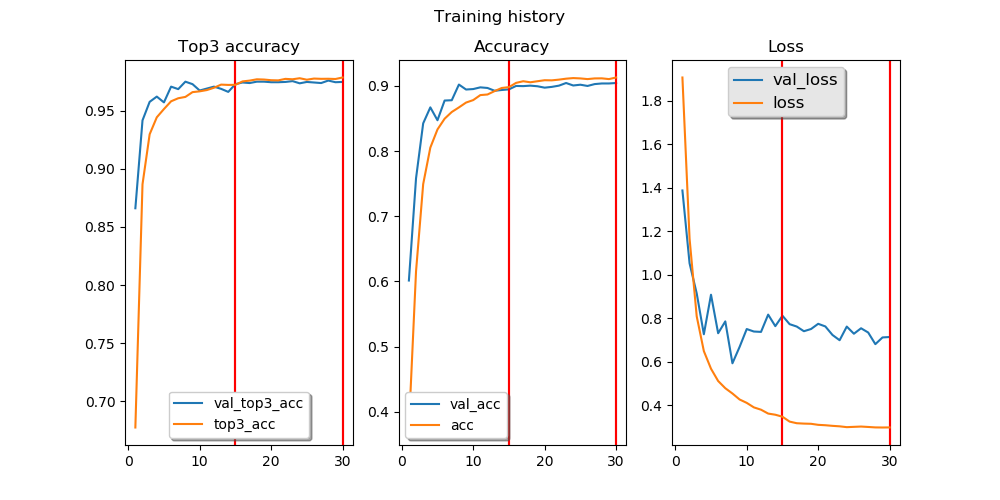

Normalized confusion matrix


<IPython.core.display.Javascript object>


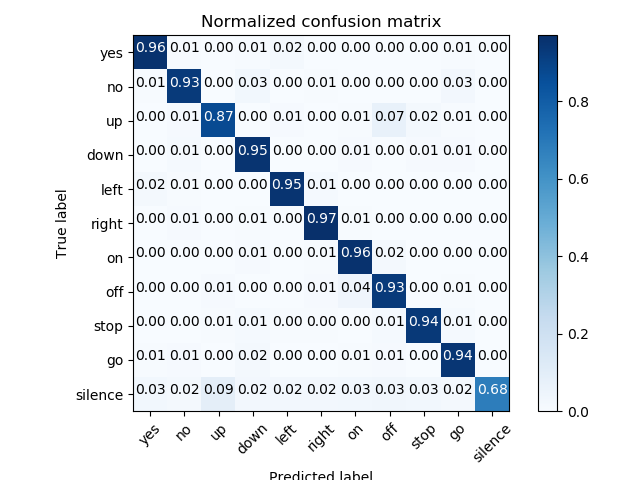

4574/4574 [==============================] - 0s 100us/step
Precision:  89.88 %
Wall time: 3min 27s


In [5]:
%%time
print("MODEL1")
inputData, inputLabel, testData, testLabel, validData, validLabel, augmentedData, augmentedLabel, validation_data, loss_weights = functions.modelSelection('model1', dataset, labels)

cnn = models.model1(inputData,inputLabel)

fittedHistory = []

for count, optimizer in enumerate(optimizers):
    print('Using optimizer number ' + str(count))
    cnn.compile(loss="categorical_crossentropy", optimizer=optimizer, metrics=['accuracy', top3_acc ], loss_weights=loss_weights)
    fittedHistory.append(cnn.fit(inputData, inputLabel,
                         epochs=epochs[count],
                         batch_size=round(inputData.shape[0]/400),
                         shuffle=True,
                         validation_data=validation_data))

functions.plotHistory(epochs, fittedHistory, 'Training History')

preds = cnn.predict(testData)

#Plot normalized confusion matrix
functions.plot_confusion_matrix(preds, testLabel, classes=labelList, normalize=True,
                      title='Normalized confusion matrix')
precision = cnn.evaluate(testData,  testLabel)
print ("Precision: ", round(precision[1]*100,2),"%")

Adding augmented dataset
Using optimizer number 0
Train on 54099 samples, validate on 4203 samples
Epoch 1/15
54099/54099 [==============================] - 11s 200us/step - loss: 1.5114 - acc: 0.4975 - top3_acc: 0.7826 - val_loss: 1.2180 - val_acc: 0.6372 - val_top3_acc: 0.9139
Epoch 2/15
54099/54099 [==============================] - 9s 169us/step - loss: 0.7701 - acc: 0.7610 - top3_acc: 0.9355 - val_loss: 1.8616 - val_acc: 0.7545 - val_top3_acc: 0.8951
Epoch 3/15
54099/54099 [==============================] - 9s 170us/step - loss: 0.5836 - acc: 0.8242 - top3_acc: 0.9511 - val_loss: 1.6498 - val_acc: 0.7580 - val_top3_acc: 0.9189
Epoch 4/15
54099/54099 [==============================] - 9s 170us/step - loss: 0.5008 - acc: 0.8488 - top3_acc: 0.9593 - val_loss: 1.8534 - val_acc: 0.7868 - val_top3_acc: 0.8727
Epoch 5/15
54099/54099 [==============================] - 9s 169us/step - loss: 0.4436 - acc: 0.8686 - top3_acc: 0.9654 - val_loss: 1.9235 - val_acc: 0.7901 - val_top3_acc: 0.8677


<IPython.core.display.Javascript object>


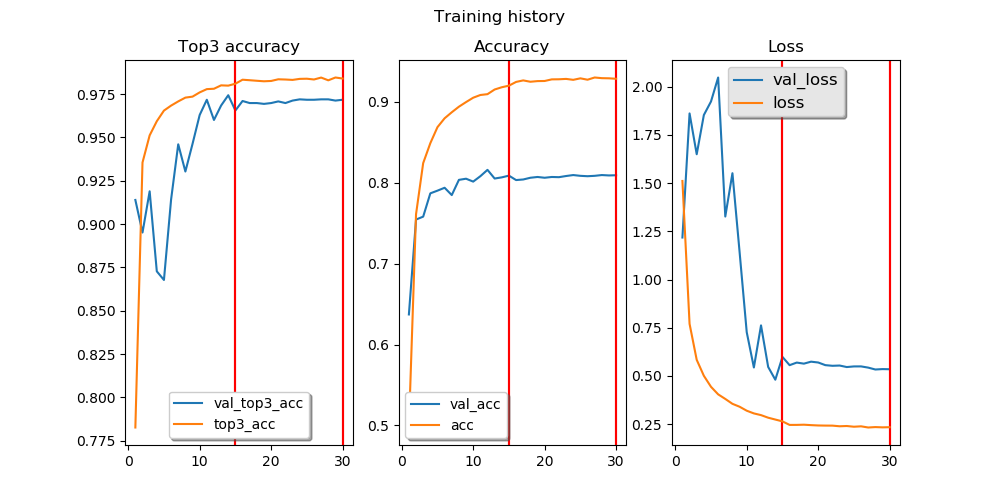

Normalized confusion matrix


<IPython.core.display.Javascript object>


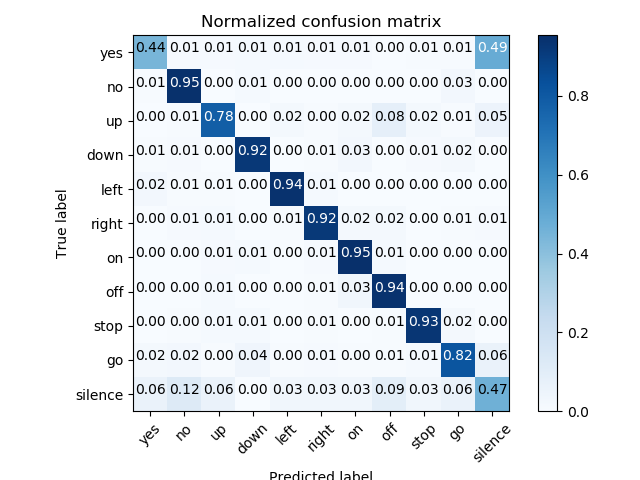

4574/4574 [==============================] - 0s 103us/step
Precision:  81.05 %
Wall time: 4min 35s


In [6]:
%%time
cnn = models.model1(inputData,inputLabel)

print('Adding augmented dataset')
inputData, inputLabel = functions.meltData(inputData, augmentedData, inputLabel, augmentedLabel, 0.7)

fittedHistory = []

for count, optimizer in enumerate(optimizers):
    print('Using optimizer number ' + str(count))
    cnn.compile(loss="categorical_crossentropy", optimizer=optimizer, metrics=['accuracy', top3_acc ], loss_weights=loss_weights)
    fittedHistory.append(cnn.fit(inputData, inputLabel,
                         epochs=epochs[count],
                         batch_size=round(inputData.shape[0]/400),
                         shuffle=True,
                         validation_data=validation_data))
    
functions.plotHistory(epochs, fittedHistory, 'Training History')

preds = cnn.predict(testData)
#Plot normalized confusion matrix
functions.plot_confusion_matrix(preds, testLabel, classes=labelList, normalize=True,
                      title='Normalized confusion matrix')
precision = cnn.evaluate(testData,  testLabel)
print ("Precision: ", round(precision[1]*100,2),"%")

name = 'cnn1.bak'
#cnn.save(dest_directory + name)

## Model2


MODEL2
Using optimizer number 0
Train on 34769 samples, validate on 4203 samples
Epoch 1/15
34769/34769 [==============================] - 19s 550us/step - loss: 2.0890 - acc: 0.2768 - top3_acc: 0.5219 - val_loss: 1.9578 - val_acc: 0.3248 - val_top3_acc: 0.6512
Epoch 2/15
34769/34769 [==============================] - 16s 474us/step - loss: 1.3759 - acc: 0.5161 - top3_acc: 0.8303 - val_loss: 1.2838 - val_acc: 0.5296 - val_top3_acc: 0.8116
Epoch 3/15
34769/34769 [==============================] - 16s 474us/step - loss: 1.0727 - acc: 0.6347 - top3_acc: 0.8935 - val_loss: 0.9420 - val_acc: 0.6847 - val_top3_acc: 0.9101
Epoch 4/15
34769/34769 [==============================] - 17s 475us/step - loss: 0.8538 - acc: 0.7133 - top3_acc: 0.9267 - val_loss: 0.5519 - val_acc: 0.8263 - val_top3_acc: 0.9641
Epoch 5/15
34769/34769 [==============================] - 17s 475us/step - loss: 0.7083 - acc: 0.7700 - top3_acc: 0.9417 - val_loss: 0.4460 - val_acc: 0.8677 - val_top3_acc: 0.9674
Epoch 6/15
34

<IPython.core.display.Javascript object>


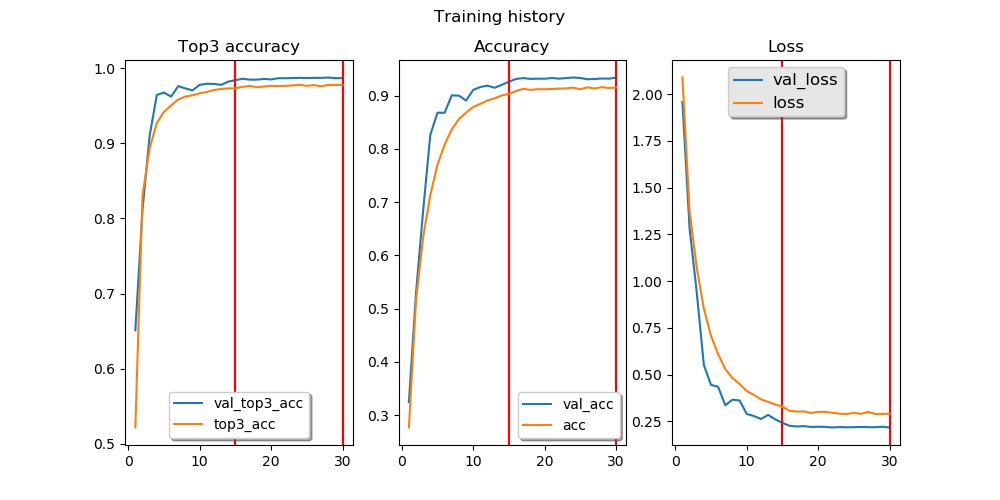

Normalized confusion matrix


<IPython.core.display.Javascript object>


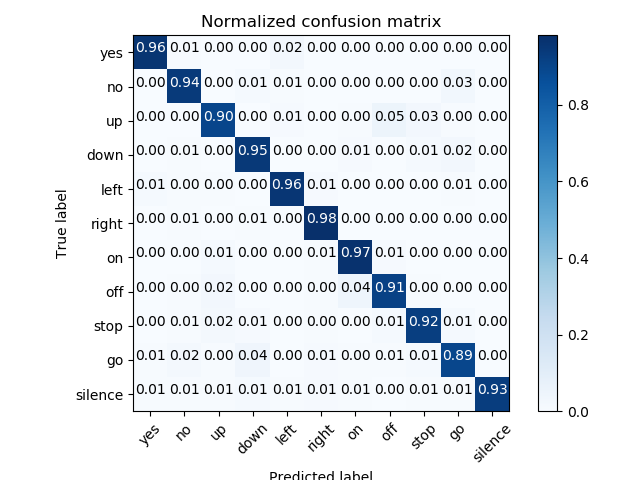

4574/4574 [==============================] - 1s 200us/step
Precision:  93.7 %
Wall time: 8min 13s


In [7]:
%%time
print("\nMODEL2")
inputData, inputLabel, testData, testLabel, validData, validLabel, augmentedData, augmentedLabel, validation_data, loss_weights = functions.modelSelection('model2', dataset, labels)

cnn = models.model2(inputData,inputLabel, baseDim = 40)

fittedHistory = []

for count, optimizer in enumerate(optimizers):
    print('Using optimizer number ' + str(count))
    cnn.compile(loss="categorical_crossentropy", optimizer=optimizer, metrics=['accuracy', top3_acc ], loss_weights=loss_weights)
    fittedHistory.append(cnn.fit(inputData, inputLabel,
                         epochs=epochs[count],
                         batch_size=round(inputData.shape[0]/400),
                         shuffle=True,
                         validation_data=validation_data))

functions.plotHistory(epochs, fittedHistory, 'Training History')

preds = cnn.predict(testData)

#Plot normalized confusion matrix
functions.plot_confusion_matrix(preds, testLabel, classes=labelList, normalize=True,
                      title='Normalized confusion matrix')
precision = cnn.evaluate(testData,  testLabel)
print ("Precision: ", round(precision[1]*100,2),"%")

Adding augmented dataset
Using optimizer number 0
Train on 54099 samples, validate on 4203 samples
Epoch 1/15
54099/54099 [==============================] - 27s 493us/step - loss: 2.0549 - acc: 0.2808 - top3_acc: 0.5350 - val_loss: 2.2583 - val_acc: 0.3336 - val_top3_acc: 0.6586
Epoch 2/15
54099/54099 [==============================] - 24s 440us/step - loss: 1.3765 - acc: 0.5108 - top3_acc: 0.8256 - val_loss: 1.2024 - val_acc: 0.6348 - val_top3_acc: 0.8991
Epoch 3/15
54099/54099 [==============================] - 24s 440us/step - loss: 1.0350 - acc: 0.6403 - top3_acc: 0.9020 - val_loss: 0.7812 - val_acc: 0.7416 - val_top3_acc: 0.9438
Epoch 4/15
54099/54099 [==============================] - 24s 441us/step - loss: 0.8125 - acc: 0.7252 - top3_acc: 0.9343 - val_loss: 0.5719 - val_acc: 0.8180 - val_top3_acc: 0.9610
Epoch 5/15
54099/54099 [==============================] - 24s 440us/step - loss: 0.6760 - acc: 0.7750 - top3_acc: 0.9471 - val_loss: 0.4257 - val_acc: 0.8722 - val_top3_acc: 0.9

<IPython.core.display.Javascript object>


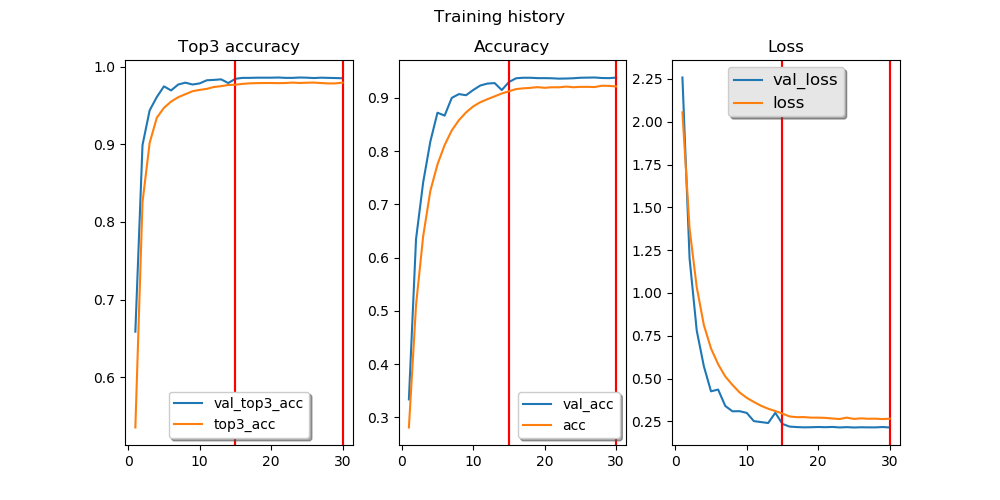

Normalized confusion matrix


<IPython.core.display.Javascript object>


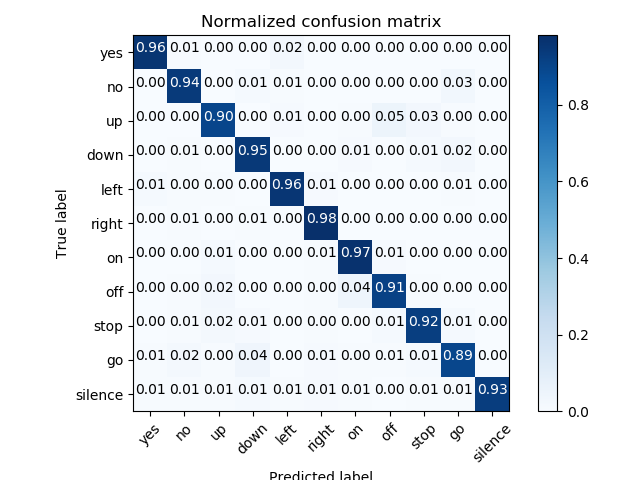

4574/4574 [==============================] - 1s 194us/step
Precision:  93.57 %
Wall time: 11min 48s


In [8]:
%%time
cnn = models.model2(inputData,inputLabel, baseDim = 40)

print('Adding augmented dataset')
inputData, inputLabel = functions.meltData(inputData, augmentedData, inputLabel, augmentedLabel, 0.7)

fittedHistory = []

for count, optimizer in enumerate(optimizers):
    print('Using optimizer number ' + str(count))
    cnn.compile(loss="categorical_crossentropy", optimizer=optimizer, metrics=['accuracy', top3_acc ], loss_weights=loss_weights)
    fittedHistory.append(cnn.fit(inputData, inputLabel,
                         epochs=epochs[count],
                         batch_size=round(inputData.shape[0]/400),
                         shuffle=True,
                         validation_data=validation_data))
    
functions.plotHistory(epochs, fittedHistory, 'Training History')

#Plot normalized confusion matrix
functions.plot_confusion_matrix(preds, testLabel, classes=labelList, normalize=True,
                      title='Normalized confusion matrix')
precision = cnn.evaluate(testData,  testLabel)
print ("Precision: ", round(precision[1]*100,2),"%")
name = 'cnn2.bak'
#cnn.save(dest_directory + name)

## TinyDarknet


TINYDARKNET
Using optimizer number 0
Train on 34769 samples, validate on 4203 samples
Epoch 1/15
34769/34769 [==============================] - 22s 632us/step - loss: 1.5887 - acc: 0.6610 - top3_acc: 0.8582 - val_loss: 0.5654 - val_acc: 0.8515 - val_top3_acc: 0.9617
Epoch 2/15
34769/34769 [==============================] - 17s 489us/step - loss: 0.4540 - acc: 0.8732 - top3_acc: 0.9674 - val_loss: 0.3744 - val_acc: 0.8948 - val_top3_acc: 0.9788
Epoch 3/15
34769/34769 [==============================] - 17s 488us/step - loss: 0.3479 - acc: 0.9021 - top3_acc: 0.9745 - val_loss: 0.3191 - val_acc: 0.9148 - val_top3_acc: 0.9814
Epoch 4/15
34769/34769 [==============================] - 17s 487us/step - loss: 0.3049 - acc: 0.9130 - top3_acc: 0.9790 - val_loss: 0.3297 - val_acc: 0.9143 - val_top3_acc: 0.9779
Epoch 5/15
34769/34769 [==============================] - 17s 487us/step - loss: 0.2750 - acc: 0.9231 - top3_acc: 0.9805 - val_loss: 0.2558 - val_acc: 0.9315 - val_top3_acc: 0.9824
Epoch 6/

<IPython.core.display.Javascript object>


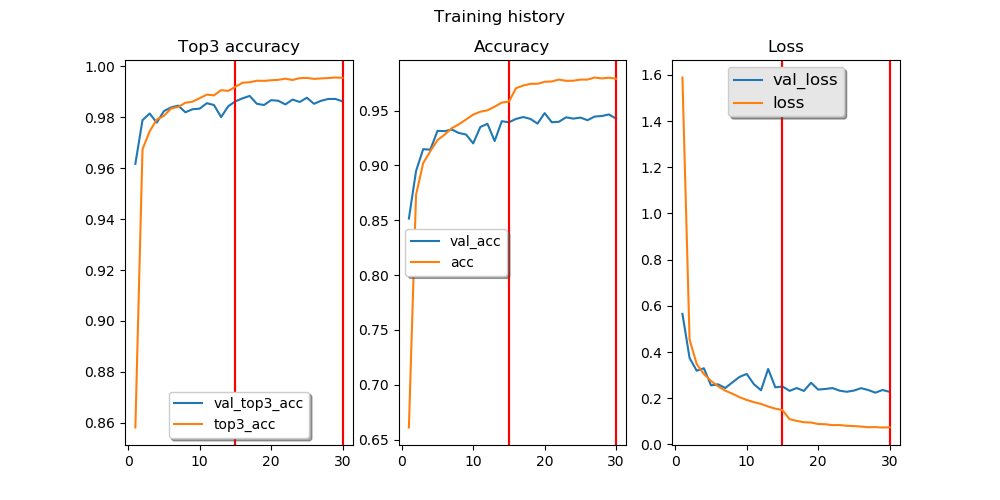

Normalized confusion matrix


<IPython.core.display.Javascript object>


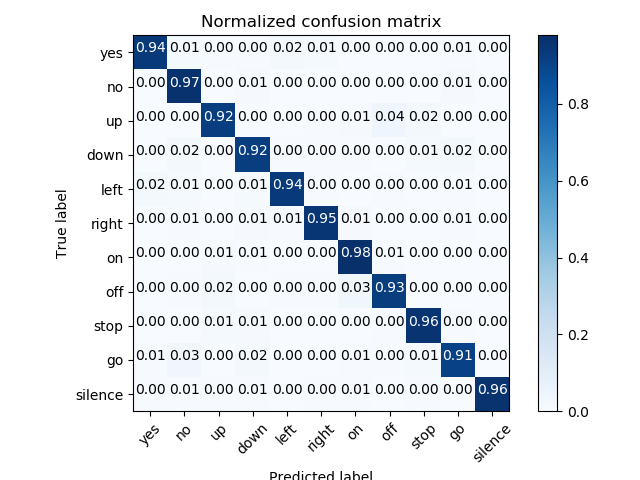

4574/4574 [==============================] - 1s 172us/step
Precision:  94.47 %
Wall time: 8min 24s


In [9]:
%%time
print("\nTINYDARKNET")
inputData, inputLabel, testData, testLabel, validData, validLabel, augmentedData, augmentedLabel, validation_data, loss_weights = functions.modelSelection('tinyDarknet', dataset, labels)

cnn = models.tinyDarknet(inputData,inputLabel, dropout = 0.1)

fittedHistory = []

for count, optimizer in enumerate(optimizers):
    print('Using optimizer number ' + str(count))
    cnn.compile(loss="categorical_crossentropy", optimizer=optimizer, metrics=['accuracy', top3_acc ], loss_weights=loss_weights)
    fittedHistory.append(cnn.fit(inputData, inputLabel,
                         epochs=epochs[count],
                         batch_size=round(inputData.shape[0]/400),
                         shuffle=True,
                         validation_data=validation_data))

functions.plotHistory(epochs, fittedHistory, 'Training History')

preds = cnn.predict(testData)

#Plot normalized confusion matrix
functions.plot_confusion_matrix(preds, testLabel, classes=labelList, normalize=True,
                      title='Normalized confusion matrix')
precision = cnn.evaluate(testData,  testLabel)
print ("Precision: ", round(precision[1]*100,2),"%")

Adding augmented dataset
Using optimizer number 0
Train on 54099 samples, validate on 4203 samples
Epoch 1/15
54099/54099 [==============================] - 29s 531us/step - loss: 1.4191 - acc: 0.7172 - top3_acc: 0.8906 - val_loss: 0.4259 - val_acc: 0.8901 - val_top3_acc: 0.9738
Epoch 2/15
54099/54099 [==============================] - 23s 427us/step - loss: 0.3676 - acc: 0.8951 - top3_acc: 0.9740 - val_loss: 0.3019 - val_acc: 0.9160 - val_top3_acc: 0.9798
Epoch 3/15
54099/54099 [==============================] - 23s 428us/step - loss: 0.2866 - acc: 0.9176 - top3_acc: 0.9795 - val_loss: 0.2770 - val_acc: 0.9255 - val_top3_acc: 0.9819
Epoch 4/15
54099/54099 [==============================] - 23s 427us/step - loss: 0.2461 - acc: 0.9292 - top3_acc: 0.9831 - val_loss: 0.2731 - val_acc: 0.9281 - val_top3_acc: 0.9843
Epoch 5/15
54099/54099 [==============================] - 23s 428us/step - loss: 0.2183 - acc: 0.9370 - top3_acc: 0.9856 - val_loss: 0.2649 - val_acc: 0.9310 - val_top3_acc: 0.9

<IPython.core.display.Javascript object>


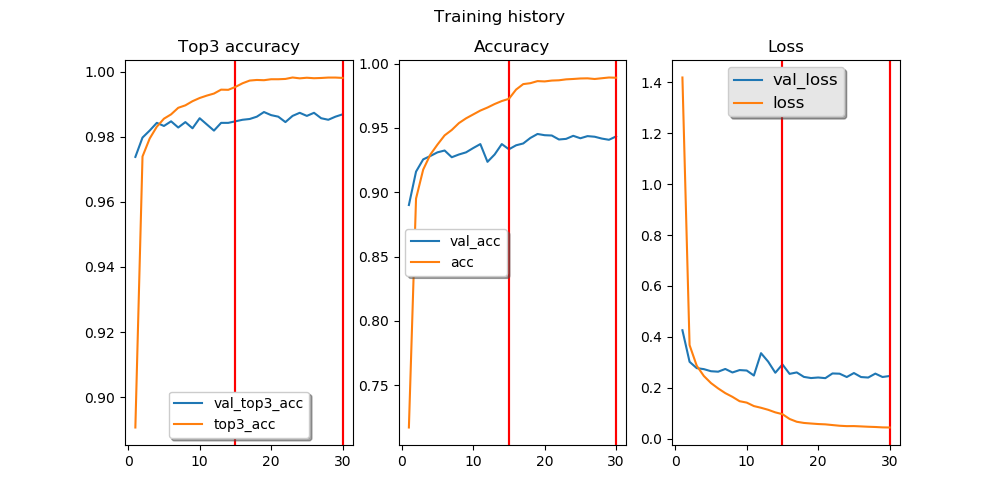

Normalized confusion matrix


<IPython.core.display.Javascript object>


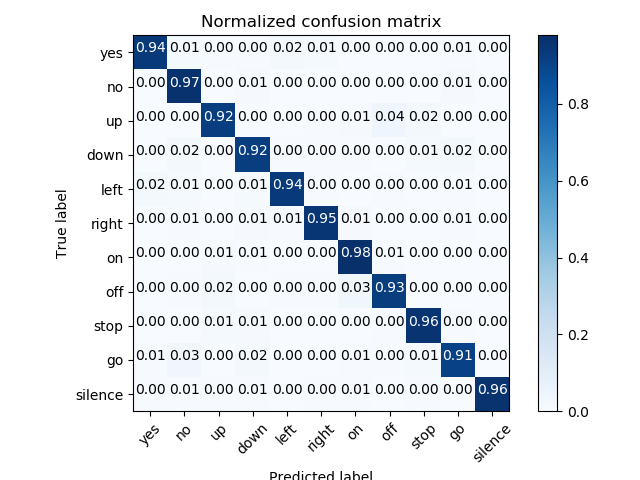

4574/4574 [==============================] - 1s 190us/step
Precision:  94.08 %
Wall time: 11min 31s


In [10]:
%%time
cnn = models.tinyDarknet(inputData,inputLabel, dropout = 0.1)

print('Adding augmented dataset')
inputData, inputLabel = functions.meltData(inputData, augmentedData, inputLabel, augmentedLabel, 0.7)

fittedHistory = []

for count, optimizer in enumerate(optimizers):
    print('Using optimizer number ' + str(count))
    cnn.compile(loss="categorical_crossentropy", optimizer=optimizer, metrics=['accuracy', top3_acc ], loss_weights=loss_weights)
    fittedHistory.append(cnn.fit(inputData, inputLabel,
                         epochs=epochs[count],
                         batch_size=round(inputData.shape[0]/400),
                         shuffle=True,
                         validation_data=validation_data))
    
functions.plotHistory(epochs, fittedHistory, 'Training History')

#Plot normalized confusion matrix
functions.plot_confusion_matrix(preds, testLabel, classes=labelList, normalize=True,
                      title='Normalized confusion matrix')
precision = cnn.evaluate(testData,  testLabel)
print ("Precision: ", round(precision[1]*100,2),"%")

name = 'tinyDarknet.bak'
#cnn.save(dest_directory + name)

# Inception

## Single input

Using optimizer number 0
Train on 34769 samples, validate on 4203 samples
Epoch 1/15
34769/34769 [==============================] - 9s 259us/step - loss: 1.2059 - acc: 0.5824 - top3_acc: 0.8300 - val_loss: 0.5530 - val_acc: 0.8270 - val_top3_acc: 0.9569
Epoch 2/15
34769/34769 [==============================] - 5s 146us/step - loss: 0.6135 - acc: 0.8074 - top3_acc: 0.9511 - val_loss: 0.4145 - val_acc: 0.8622 - val_top3_acc: 0.9667
Epoch 3/15
34769/34769 [==============================] - 5s 147us/step - loss: 0.4887 - acc: 0.8532 - top3_acc: 0.9618 - val_loss: 0.3458 - val_acc: 0.8867 - val_top3_acc: 0.9734
Epoch 4/15
34769/34769 [==============================] - 5s 146us/step - loss: 0.4192 - acc: 0.8733 - top3_acc: 0.9679 - val_loss: 0.3334 - val_acc: 0.8887 - val_top3_acc: 0.9741
Epoch 5/15
34769/34769 [==============================] - 5s 147us/step - loss: 0.3640 - acc: 0.8921 - top3_acc: 0.9711 - val_loss: 0.3128 - val_acc: 0.9048 - val_top3_acc: 0.9745
Epoch 6/15
34769/34769 [==

<IPython.core.display.Javascript object>


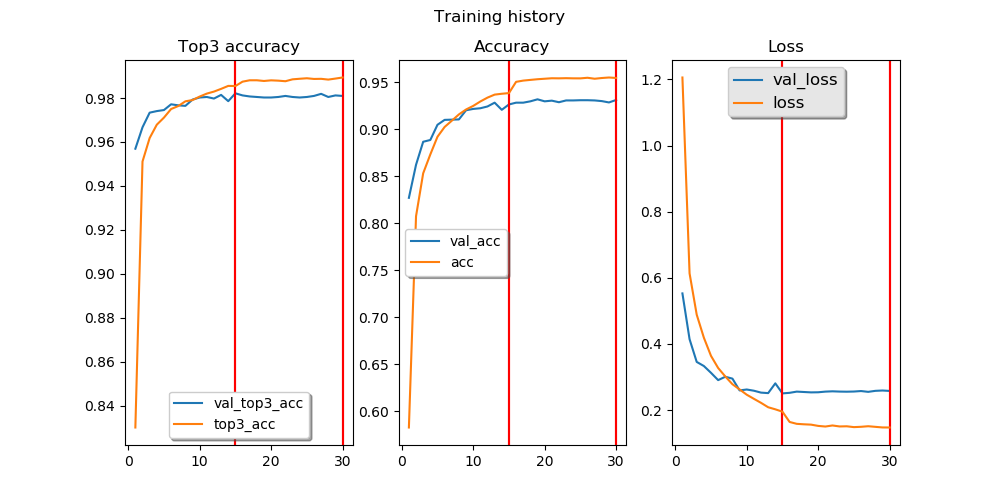

Normalized confusion matrix


<IPython.core.display.Javascript object>


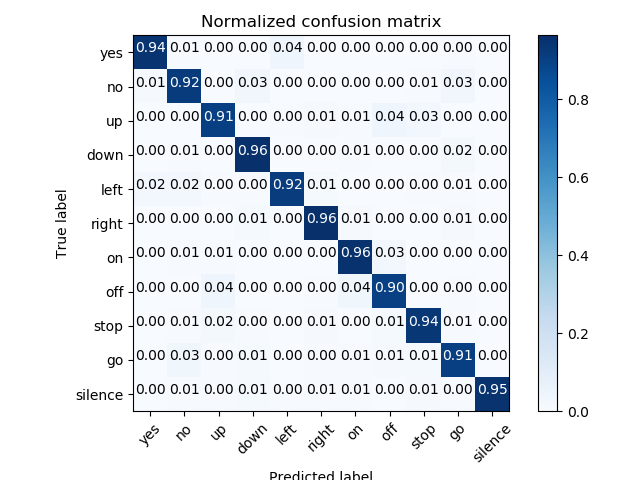

4574/4574 [==============================] - 0s 103us/step
Precision:  93.27 %
Wall time: 2min 38s


In [11]:
%%time
inputData, inputLabel, testData, testLabel, validData, validLabel, augmentedData, augmentedLabel, validation_data, loss_weights = functions.modelSelection('SiSoInc', dataset, labels)

cnn = models.SiSoInception(inputData,inputLabel)

fittedHistory = []

for count, optimizer in enumerate(optimizers):
    print('Using optimizer number ' + str(count))
    cnn.compile(loss="categorical_crossentropy", optimizer=optimizer, metrics=['accuracy', top3_acc ], loss_weights=loss_weights)
    fittedHistory.append(cnn.fit(inputData, inputLabel,
                         epochs=epochs[count],
                         batch_size=round(inputData.shape[0]/400),
                         shuffle=True,
                         validation_data=validation_data))

functions.plotHistory(epochs, fittedHistory, 'Training History')

preds = cnn.predict(testData)

#Plot normalized confusion matrix
functions.plot_confusion_matrix(preds, testLabel, classes=labelList, normalize=True,
                      title='Normalized confusion matrix')
precision = cnn.evaluate(testData,  testLabel)
print ("Precision: ", round(precision[1]*100,2),"%")

Adding augmented dataset
Using optimizer number 0
Train on 54099 samples, validate on 4203 samples
Epoch 1/15
54099/54099 [==============================] - 10s 194us/step - loss: 1.0516 - acc: 0.6424 - top3_acc: 0.8634 - val_loss: 0.4686 - val_acc: 0.8551 - val_top3_acc: 0.9636
Epoch 2/15
54099/54099 [==============================] - 6s 117us/step - loss: 0.5084 - acc: 0.8444 - top3_acc: 0.9590 - val_loss: 0.3613 - val_acc: 0.8875 - val_top3_acc: 0.9705
Epoch 3/15
54099/54099 [==============================] - 6s 116us/step - loss: 0.4102 - acc: 0.8756 - top3_acc: 0.9676 - val_loss: 0.3430 - val_acc: 0.8922 - val_top3_acc: 0.9722
Epoch 4/15
54099/54099 [==============================] - 6s 117us/step - loss: 0.3627 - acc: 0.8908 - top3_acc: 0.9720 - val_loss: 0.3118 - val_acc: 0.9067 - val_top3_acc: 0.9745
Epoch 5/15
54099/54099 [==============================] - 6s 117us/step - loss: 0.3220 - acc: 0.9018 - top3_acc: 0.9758 - val_loss: 0.3031 - val_acc: 0.9077 - val_top3_acc: 0.9764


<IPython.core.display.Javascript object>


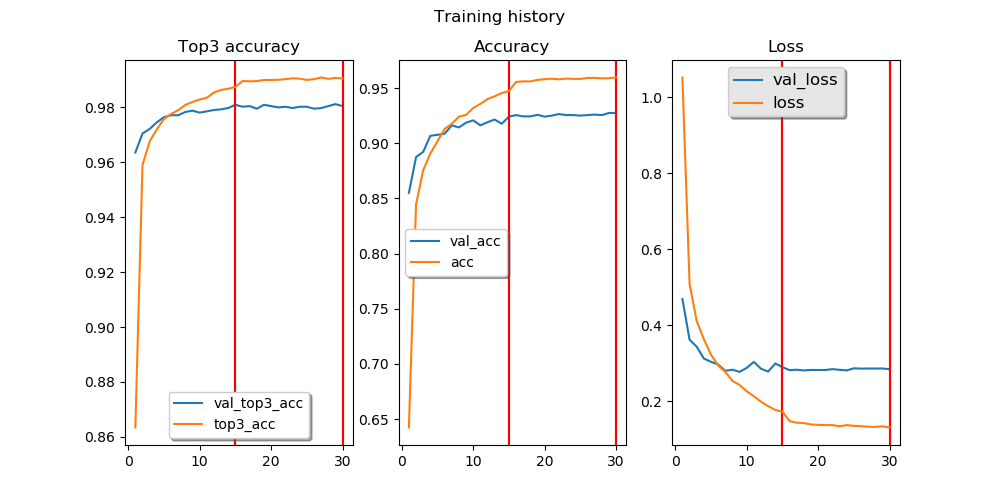

Normalized confusion matrix


<IPython.core.display.Javascript object>


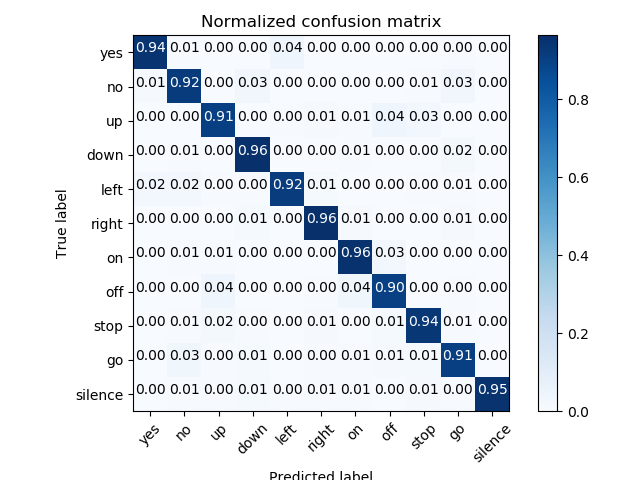

4574/4574 [==============================] - 0s 108us/step
Precision:  92.83 %
Wall time: 3min 16s


In [12]:
%%time
cnn = models.SiSoInception(inputData,inputLabel)

print('Adding augmented dataset')
inputData, inputLabel = functions.meltData(inputData, augmentedData, inputLabel, augmentedLabel, 0.7)

fittedHistory = []

for count, optimizer in enumerate(optimizers):
    print('Using optimizer number ' + str(count))
    cnn.compile(loss="categorical_crossentropy", optimizer=optimizer, metrics=['accuracy', top3_acc ], loss_weights=loss_weights)
    fittedHistory.append(cnn.fit(inputData, inputLabel,
                         epochs=epochs[count],
                         batch_size=round(inputData.shape[0]/400),
                         shuffle=True,
                         validation_data=validation_data))
    
functions.plotHistory(epochs, fittedHistory, 'Training History')

#Plot normalized confusion matrix
functions.plot_confusion_matrix(preds, testLabel, classes=labelList, normalize=True,
                      title='Normalized confusion matrix')
precision = cnn.evaluate(testData,  testLabel)
print ("Precision: ", round(precision[1]*100,2),"%")

## Multiple input

Using optimizer number 0
Train on 34769 samples, validate on 4203 samples
Epoch 1/15
34769/34769 [==============================] - 12s 345us/step - loss: 1.1877 - acc: 0.5932 - top3_acc: 0.8263 - val_loss: 0.5351 - val_acc: 0.8258 - val_top3_acc: 0.9615
Epoch 2/15
34769/34769 [==============================] - 8s 239us/step - loss: 0.5630 - acc: 0.8254 - top3_acc: 0.9567 - val_loss: 0.3758 - val_acc: 0.8789 - val_top3_acc: 0.9712
Epoch 3/15
34769/34769 [==============================] - 8s 239us/step - loss: 0.4398 - acc: 0.8644 - top3_acc: 0.9665 - val_loss: 0.3366 - val_acc: 0.8963 - val_top3_acc: 0.9764
Epoch 4/15
34769/34769 [==============================] - 8s 239us/step - loss: 0.3824 - acc: 0.8838 - top3_acc: 0.9716 - val_loss: 0.3152 - val_acc: 0.9005 - val_top3_acc: 0.9776
Epoch 5/15
34769/34769 [==============================] - 8s 239us/step - loss: 0.3398 - acc: 0.8955 - top3_acc: 0.9751 - val_loss: 0.2792 - val_acc: 0.9108 - val_top3_acc: 0.9786
Epoch 6/15
34769/34769 [=

<IPython.core.display.Javascript object>


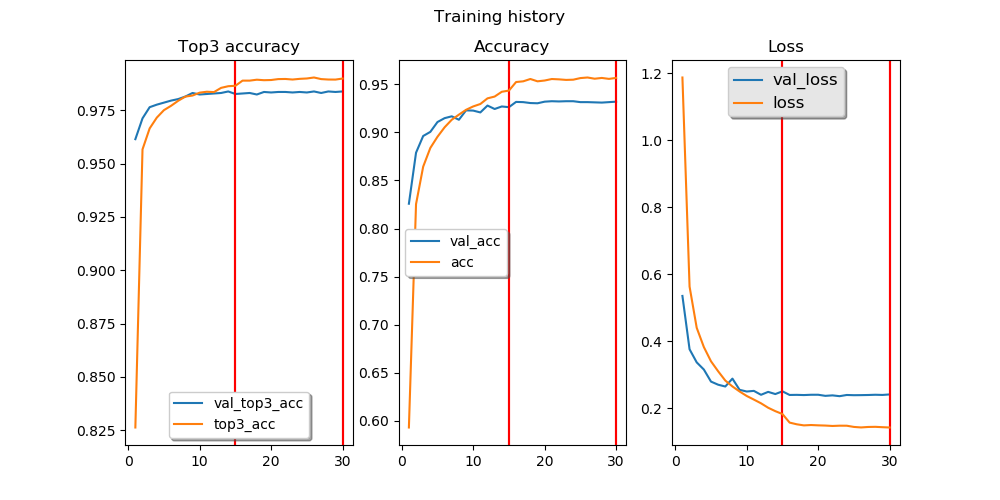

Normalized confusion matrix


<IPython.core.display.Javascript object>


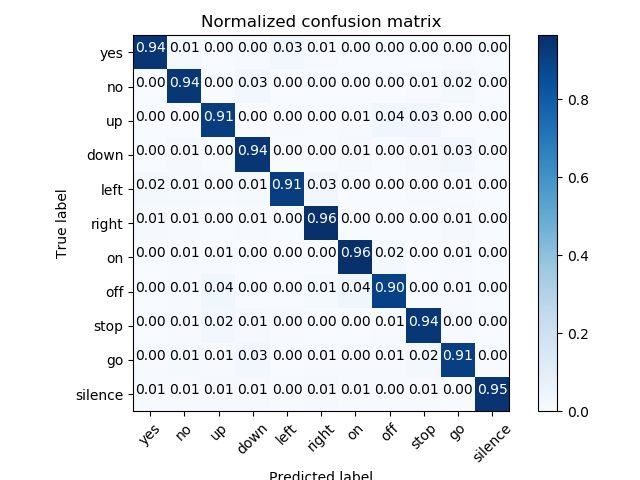

4574/4574 [==============================] - 1s 142us/step
Precision:  93.11 %
Wall time: 4min 7s


In [13]:
%%time
inputData, inputLabel, testData, testLabel, validData, validLabel, augmentedData, augmentedLabel, validation_data, loss_weights = functions.modelSelection('MiSoInc', dataset, labels)

cnn = models.MiSoInception(inputData, inputLabel, dropout = 0.4)

fittedHistory = []

for count, optimizer in enumerate(optimizers):
    print('Using optimizer number ' + str(count))
    cnn.compile(loss="categorical_crossentropy", optimizer=optimizer, metrics=['accuracy', top3_acc ], loss_weights=loss_weights)
    fittedHistory.append(cnn.fit(inputData, inputLabel,
                         epochs=epochs[count],
                         batch_size=round(inputData[0].shape[0]/400),
                         shuffle=True,
                         validation_data=validation_data))

functions.plotHistory(epochs, fittedHistory, 'Training History')

preds = cnn.predict(testData)

#Plot normalized confusion matrix
functions.plot_confusion_matrix(preds, testLabel, classes=labelList, normalize=True,
                      title='Normalized confusion matrix')
precision = cnn.evaluate(testData,  testLabel)
print ("Precision: ", round(precision[1]*100,2),"%")

Adding augmented dataset
Using optimizer number 0
Train on 54099 samples, validate on 4203 samples
Epoch 1/15
54099/54099 [==============================] - 15s 279us/step - loss: 1.1450 - acc: 0.6089 - top3_acc: 0.8418 - val_loss: 0.4933 - val_acc: 0.8520 - val_top3_acc: 0.9612
Epoch 2/15
54099/54099 [==============================] - 11s 205us/step - loss: 0.5725 - acc: 0.8218 - top3_acc: 0.9545 - val_loss: 0.3749 - val_acc: 0.8798 - val_top3_acc: 0.9736
Epoch 3/15
54099/54099 [==============================] - 11s 204us/step - loss: 0.4510 - acc: 0.8619 - top3_acc: 0.9648 - val_loss: 0.3406 - val_acc: 0.8898 - val_top3_acc: 0.9741
Epoch 4/15
54099/54099 [==============================] - 11s 204us/step - loss: 0.3897 - acc: 0.8811 - top3_acc: 0.9703 - val_loss: 0.3037 - val_acc: 0.9022 - val_top3_acc: 0.9764
Epoch 5/15
54099/54099 [==============================] - 11s 205us/step - loss: 0.3498 - acc: 0.8934 - top3_acc: 0.9734 - val_loss: 0.3014 - val_acc: 0.9063 - val_top3_acc: 0.9

<IPython.core.display.Javascript object>


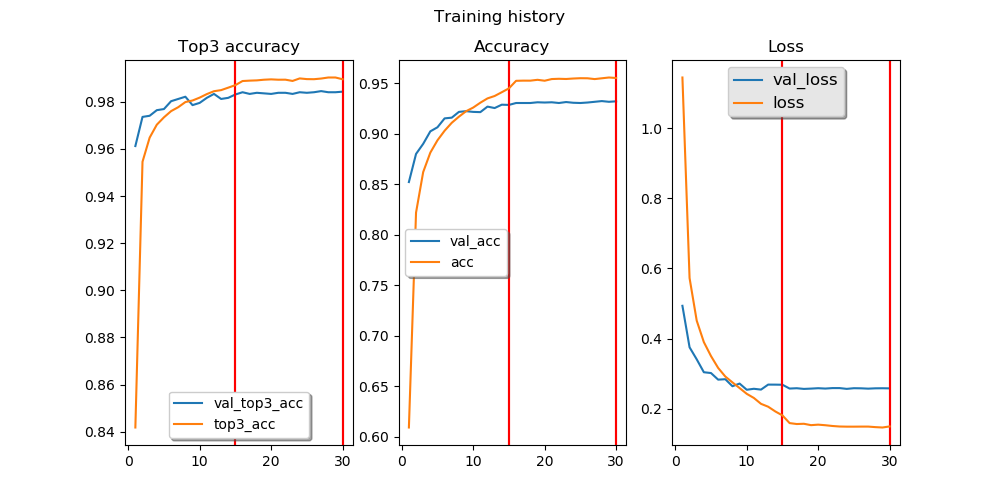

Normalized confusion matrix


<IPython.core.display.Javascript object>


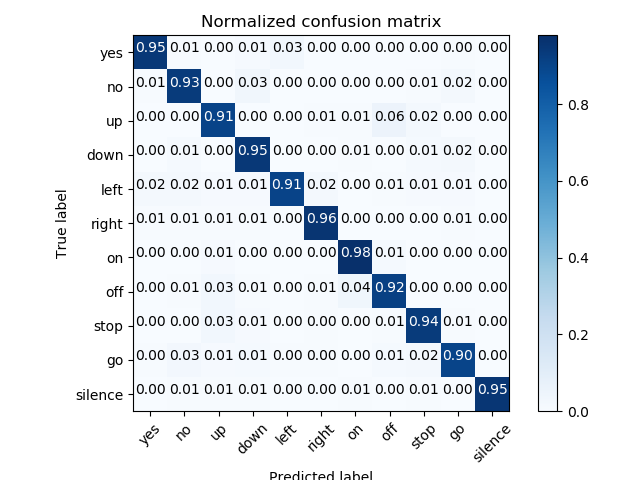

4574/4574 [==============================] - 1s 145us/step
Precision:  93.46 %
Wall time: 5min 33s


In [14]:
%%time
cnn = models.MiSoInception(inputData,inputLabel)

print('Adding augmented dataset')
inputData, inputLabel = functions.meltData(inputData, augmentedData, inputLabel, augmentedLabel, 0.7)

fittedHistory = []

for count, optimizer in enumerate(optimizers):
    print('Using optimizer number ' + str(count))
    cnn.compile(loss="categorical_crossentropy", optimizer=optimizer, metrics=['accuracy', top3_acc ], loss_weights=loss_weights)
    fittedHistory.append(cnn.fit(inputData, inputLabel,
                         epochs=epochs[count],
                         batch_size=round(inputData[0].shape[0]/400),
                         shuffle=True,
                         validation_data=validation_data))
    
functions.plotHistory(epochs, fittedHistory, 'Training History')

preds = cnn.predict(testData)

#Plot normalized confusion matrix
functions.plot_confusion_matrix(preds, testLabel, classes=labelList, normalize=True,
                      title='Normalized confusion matrix')
precision = cnn.evaluate(testData,  testLabel)
print ("Precision: ", round(precision[1]*100,2),"%")